# Training Models

In [5]:
# Generate some linear-looking data
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

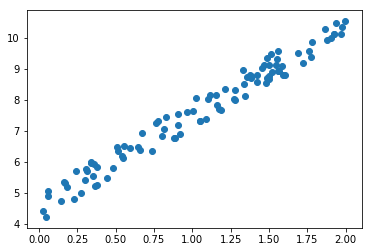

In [6]:
# Plot the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.show()

In [7]:
# Compute the coefficients using the normal equation
# We will compute the inverse of the matrix and use .dot() for
# matrix multiplication
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
# The actual function that we used to generate the data is
# y = 4 + 3x + Gaussian noise. Let's see what the equation found:
theta_best

array([[4.62880769],
       [2.87880259]])

In [9]:
# Now we can make predictions using theta hat:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.62880769],
       [10.38641286]])

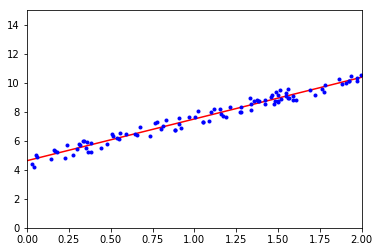

In [10]:
# Let's plot this model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
# The equivalent code using scikit-learn looks like this:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.62880769]), array([[2.87880259]]))

In [12]:
# We can also compute the prediction
lin_reg.predict(X_new)

array([[ 4.62880769],
       [10.38641286]])

# Batch Gradient Descent

In [1]:
# Gradient Descent is a very generic optimization algorithm capable of finding
# optimal solutions to a wide range of problems. The general idea of Gradient
# Descent is to tweak parameters iteratively in order to minimize a cost
# function.

In [13]:
# Implementation of the Gradient Descent step algorithm
import numpy as np

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
# Let's look at the resulting theta:
theta

array([[4.62880769],
       [2.87880259]])

In [15]:
# This value is ecxactly what the normal equation found.

# Stochastic Gradient Descent

In [16]:
# The Batch Gradient Descent always uses the entire training set, which
# makes it pretty slow. At the oppposite extreme, stochastic gradient descent
# just picks a random instance in the training set at every step, and computes
# the gradients based only on that single instance. However, due to the random
# nature of this process, the algorithm will find good, but not optimal results.

# One solution to this is to reduce the learning rate as the algorithm moves
# towards the minimum (create a learning schedule).

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m * i)
        theta = theta - eta * gradients

In [17]:
# By convention we iterate by rounds of m iterations; each round is called an
# epoch. While the Batch Gradient Descent code iterated 1,000 times through
# the whole training set, this code goes through the training set only 50
# times and reaches a fairly good solution:
theta

array([[4.45719678],
       [2.99898848]])

In [20]:
# To perform Linear Regression using SGD with Scikit-Learn, you can use the
# SGDRegressor class, which defaults to optimizing the squared error cost
# function. The following code runs 50 epochs, starting with a learning rate
# of 0.1 (eta0=0.1), using the default learning schedule (different from the
# preceding one), and it does not use any regularization (penalty=None; more
# details on this shortly):
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [22]:
# Once again, you find a solution very close to the one returned by the
# Normal Equation
sgd_reg.intercept_, sgd_reg.coef_

(array([4.6294857]), array([2.87695774]))

In [23]:
# MINI BATCH GRADIENT DESCENT
# The last option would be to use mini batches instead of the whole
# batch or single instances as a compromise.

# Polynomial Regression

In [24]:
# Surprisingly, we can fit a linear model to fit nonlinear data.
# A simple way to do this is to add powers of each feature as new features,
# then train a linear model on this extended set of features. This is called
# Polynomial Regression.

In [25]:
# First, we generate some data based on a quadratic equation.
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

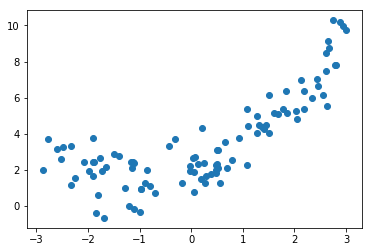

In [26]:
# We plot the data
plt.scatter(X, y)
plt.show()

In [27]:
# Clearly a straight line won't fit, so we try a 2nd degree polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.31531209])

In [28]:
# X_poly should now contain the original AND the square of this value
X_poly[0]

array([-0.31531209,  0.09942171])

In [29]:
# Now we can fit a Linear Regression model including the polynomial terms
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94617763]), array([[0.98513815, 0.49237323]]))

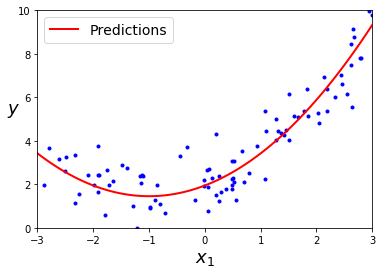

In [76]:
# Let's plot the regression line

# linspace returns evenly spaced numbers over a specified interval
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.") # b. means blue dots
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions") # r- means red line
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_predictions_plot")
plt.show()

In [77]:
# LEARNING CURVES
# Learning curves are plots of the model's performance on the training set and
# the validation set as a function of the training set size.
# To generate the plots, simply train the model several times on different sized
# subsets of the training set.

In [83]:
# The following code defines a function that plots
# the learning curves of a model given some training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

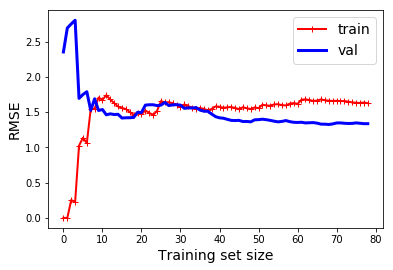

In [84]:
# Plot the learning curves
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

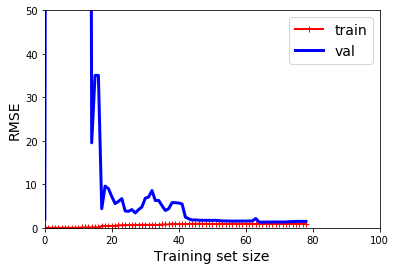

In [90]:
# Now let's look at the learning curves of a 10th degree polynomial model
# on the same data
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression())
))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 100, 0, 50])
plt.show()

In [91]:
# The large gap means that the 10th degree polynomial model performs
# significantly better on the training set than on the test set, which
# shouldn't be too surprising. Of course the error on the training data
# is much lower, but the model does not generalize well.

# Regularized Linear Models

In [92]:
# As we saw in Chapters 1 and 2, a good way to reduce overfitting is to
# regularize the model (i.e., to constrain it): the fewer degrees of freedom
# it has, the harder it will be for it to overfit the data. For example, a
# simple way to regularize a polynomial model is to reduce the number of
# polynomial degrees.

# For a linear model, regularization is typically achieved by constraining the
# weights of the model. We will now look at Ridge Regression, Lasso Regression,
# and Elastic Net, which implement three different ways to constrain the
# weights.

# Ridge Regression

In [93]:
# Ridge Regression is a regularized version of Linear Regression, which is
# achieved by adding a regularization term to the cost function. This forces
# the model not only to fit data, but also keep the model weights as small as
# possible. Note that the term should only be added to the cost function during
# training. Once the model is trained, you want to evaluate the model's
# performance using the unregularized performance measure.

In [94]:
# The hyperparameter alpha controls how much you want to regularize the model.
# If alpha = 0 then the Ridge Regression is just a Linear Regression. If alpha
# is very large, then all weights end up very close to zero and the result is
# a flat line going through the data's mean.

In [95]:
# Performing Ridge Regression on our random data ...
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.03663751]])

In [98]:
# ... and using stochastic gradient descent. (setting the penalty to l2
# is performing the Ridge Regression)
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.36312151])

# Lasso Regression

In [99]:
# LASSO = Least Absolute Shrinkage and Selection Operator Regression
# Like Ridge Regression, it adds a regularization term to the cost function.
# It tends to completely eliminate thte weights of the least important
# features (i.e., set them to zero)

# In other words, Lasso Regression automatically performs feature selection
# and outputs a sparse model (i.e. with few nonzero feature weights)

In [100]:
# Performing Lasso Regression ...
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.99583943])

In [101]:
# ... and using stochastic gradient descent. (setting the penalty to l1
# is performing the Lasso Regression)
sgd_reg = SGDRegressor(max_iter=5, penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.34108878])

# Elastic Net

In [102]:
# Elastic Net is a middle ground between Ridge Regression and Lasso Regression.
# The regularization term is a simple mix of both Ridge and Lasso’s
# regularization terms, and you can control the mix ratio r.

In [104]:
# Performing Elastic Net Regression ...
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.9928834])

In [105]:
# ... and using stochastic gradient descent. (setting the penalty to elasticnet
# is performing the Elastic Net Regression)
sgd_reg = SGDRegressor(max_iter=5, penalty="elasticnet")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.36387742])

# Summary: Regularized Linear Models

In [103]:
# So when should you use Linear Regression, Ridge, Lasso, or Elastic Net?
# It is almost always preferable to have at least a little bit of
# regularization, so generally you should avoid plain Linear Regression.
# Ridge is a good default, but if you suspect that only a few features are
# actually useful, you should prefer Lasso or Elastic Net since they tend
# to reduce the useless features’ weights down to zero as we have discussed.
# In general, Elastic Net is preferred over Lasso since Lasso may behave
# erratically when the number of features is greater than the number of
# training instances or when several features are strongly correlated.